In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [2]:
churn = pd.read_csv('data/Churn_Modelling.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


- RowNumber : Row Numbers from 1 to 10000
- CustomerId : Unique Ids for bank customer identification (의미없는변수)
- Surname: Customer's last name (의미없는변수)
- CreditScore : Credit score of the customer (수치형)
- Geography : The country from which the customer belongs (범주형) -> ['Germany', 'Spain', 'France']
- Gender : Male or Female Age : Age of the customer (범주형) -> ['Male', 'Female']
- Age : Age of customer (수치형)
- Tenure : Number of years for which the customer has been with the bank (수치형) -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Balance : Bank balance of the customer (수치형)
- NumOfProducts : Number of bank products the customer is utilising (수치형) -> [1, 2, 3, 4]
- HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not (범주형) -> [0, 1]
- IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not (범주형) -> [0, 1]
- EstimatedSalary : Estimated salary of the customer in Dollars (수치형)
- Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained (범주형) -> [0, 1]

In [3]:
print('CustomerId:', len(list(set(churn['CustomerId']))),
      '\nSurname:',len(list(set(churn['Surname']))),
      '\nCreditScore:', len(list(set(churn['CreditScore']))),
      '\nGeography:', len(list(set(churn['Geography']))),
      '\nGender:', len(list(set(churn['Gender']))),
      '\nAge:', len(list(set(churn['Age']))),
      '\nTenure:', len(list(set(churn['Tenure']))),
      '\nBalance:', len(list(set(churn['Balance']))),
      '\nNumOfProducts:', len(list(set(churn['NumOfProducts']))),
      '\nHasCrCard:', len(list(set(churn['HasCrCard']))),
      '\nIsActiveMember:', len(list(set(churn['IsActiveMember']))),
      '\nEstimateSalary:', len(list(set(churn['EstimatedSalary']))))

CustomerId: 10000 
Surname: 2932 
CreditScore: 460 
Geography: 3 
Gender: 2 
Age: 70 
Tenure: 11 
Balance: 6382 
NumOfProducts: 4 
HasCrCard: 2 
IsActiveMember: 2 
EstimateSalary: 9999


## 수치형 데이터 분석

### CreditScore과 Exited

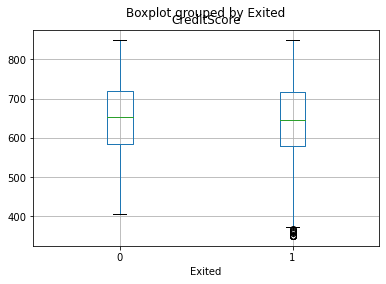

In [4]:
churn.boxplot(column=['CreditScore'], by='Exited')

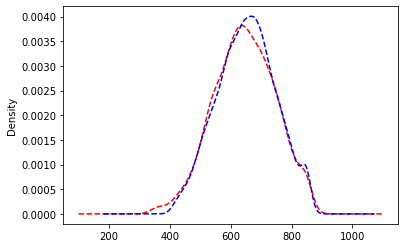

In [5]:
cmYES = churn[churn.Exited == 1]
cmNO = churn[churn.Exited == 0]

cmYES['CreditScore'].plot(kind='kde', style='r--') 
cmNO['CreditScore'].plot(kind='kde', style='b--') 

### Age와 Exited

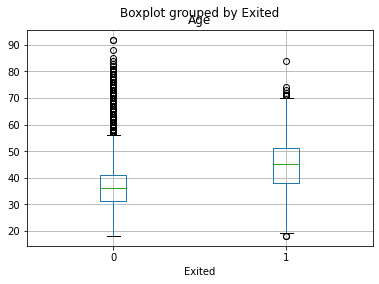

In [6]:
churn.boxplot(column=['Age'], by='Exited')

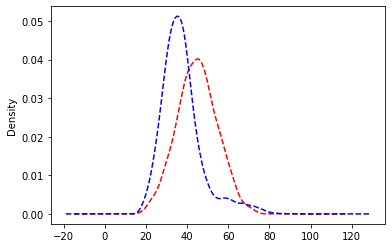

In [7]:
cmYES = churn[churn.Exited == 1]
cmNO = churn[churn.Exited == 0]

cmYES['Age'].plot(kind='kde', style='r--') 
cmNO['Age'].plot(kind='kde', style='b--') 

### Balance와 Exited

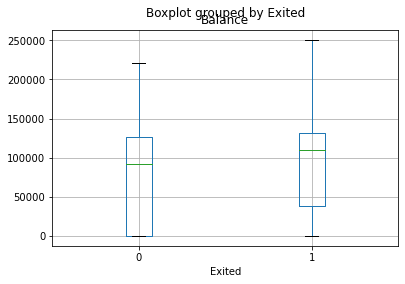

In [8]:
churn.boxplot(column=['Balance'], by='Exited')

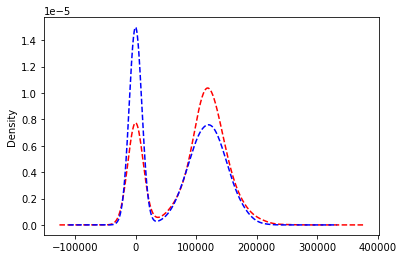

In [9]:
cmYES = churn[churn.Exited == 1]
cmNO = churn[churn.Exited == 0]

cmYES['Balance'].plot(kind='kde', style='r--') 
cmNO['Balance'].plot(kind='kde', style='b--') 

### EstimatedSalary과 Exited

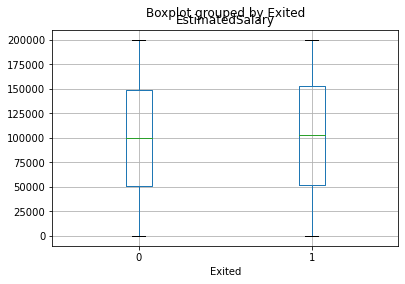

In [66]:
churn.boxplot(column=['EstimatedSalary'], by='Exited')

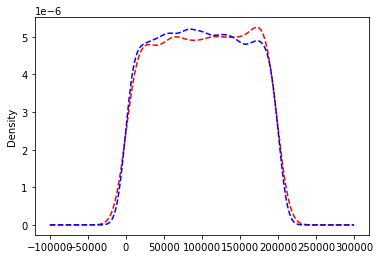

In [11]:
cmYES = churn[churn.Exited == 1]
cmNO = churn[churn.Exited == 0]

cmYES['EstimatedSalary'].plot(kind='kde', style='r--') 
cmNO['EstimatedSalary'].plot(kind='kde', style='b--') 

## 모형 학습

In [76]:
x = churn.iloc[:, np.r_[3,6,7,9,12]]
y = churn['Exited']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   NumOfProducts    10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Predictions:{}".format(y_pred))

y_score = clf.predict_proba(x_test)
print("Predictions: {}".format(y_score))

Predictions:[0 0 0 ... 0 0 0]
Predictions: [[0.72452869 0.27547131]
 [0.85089025 0.14910975]
 [0.81839553 0.18160447]
 ...
 [0.94056657 0.05943343]
 [0.69752899 0.30247101]
 [0.83010086 0.16989914]]


## 분류 성과 측정

In [80]:
confusion_matrix(y_test, y_pred)

array([[1954,   53],
       [ 472,   21]], dtype=int64)

In [87]:
# 정확도 / 정밀도 / 재현율 / f1 score / roc면적
print('Accuracy:', clf.score(x_test, y_test))
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred))


# 10겹 교차검증
clf_cv = LogisticRegression(max_iter=500)
scores = cross_val_score(clf_cv, x, y, scoring='roc_auc', cv=10)
print('scores.mean:', scores.mean())

Accuracy: 0.7968
precision_score: 0.3548387096774194
recall_score: 0.044897959183673466
f1_score: 0.07971014492753624
roc_auc_score: 0.5124987308356179
scores.mean: 0.6613988258235052


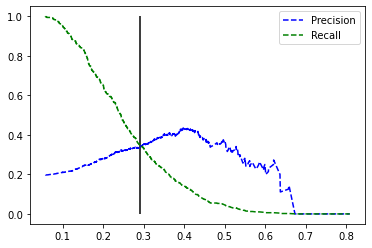

In [113]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, threholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.vlines(x=0.29,ymin=0,ymax=1)
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

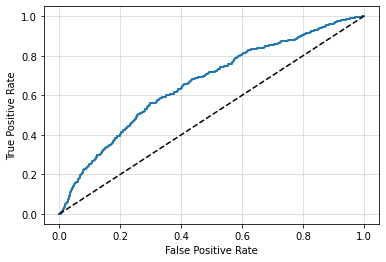

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([[0],[1]], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(which='major', axis='both', alpha=0.5)
    
plot_roc_curve(fpr, tpr)
plt.show()